In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from PIL import Image
import os
import cv2

In [ ]:
!pip install pytesseract
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install Pillow
! pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


##Sample Images

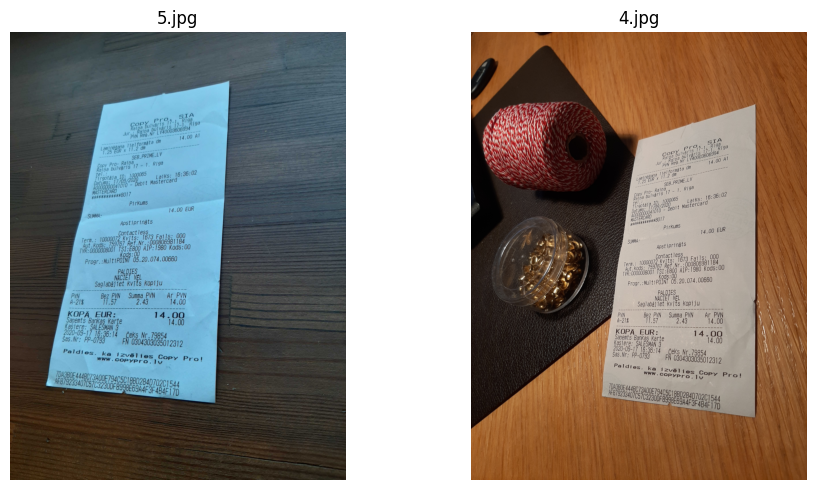

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

class ImageLoader:
    def __init__(self, folder_path, image_files):
        self.folder_path = folder_path
        self.image_files = image_files

    def load_images(self):
        images = []
        for file in self.image_files:
            img = cv2.imread(os.path.join(self.folder_path, file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
        return images

    def display_images(self):
        fig = plt.figure(figsize=(10, 5))
        images = self.load_images()
        for i, img in enumerate(images):
            ax = fig.add_subplot(1, len(images), i+1)
            ax.imshow(img)
            ax.set_title(self.image_files[i])
            ax.axis('off')
        plt.tight_layout()
        plt.show()

# Example usage:
folder_path = "/content/drive/MyDrive/cv_project_images/imgcv"
image_files = ["5.jpg", "4.jpg"]

image_loader = ImageLoader(folder_path, image_files)
image_loader.display_images()


In [ ]:
import pytesseract

In [ ]:
from pytesseract import Output

In [ ]:
from prettytable import PrettyTable

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class ImageProcessor:
    @staticmethod
    def custom_resize(image, ratio):
        height, width = image.shape[:2]
        new_height = int(height * ratio)
        new_width = int(width * ratio)
        new_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

        for i in range(new_height):
            for j in range(new_width):
                new_image[i, j] = image[int(i / ratio), int(j / ratio)]

        return new_image

    @staticmethod
    def plot_gray(image):
        fig, ax = plt.subplots(figsize=(16, 10))
        ax.imshow(image, cmap='Greys_r')
        return ax

    @staticmethod
    def plot_rgb(image):
        plt.figure(figsize=(16, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

    @staticmethod
    def approximate_contour(contour):
        _, contours, _ = cv2.findContours(contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        epsilon = 0.032 * cv2.arcLength(contours[0], True)
        approx = cv2.approxPolyDP(contours[0], epsilon, True)

        return approx
image_resized = ImageProcessor.custom_resize(image, 0.5)
ImageProcessor.plot_rgb(image_resized)


In [ ]:
import cv2
import numpy as np

class ReceiptProcessor:
    @staticmethod
    def find_receipt_contour(contours):
        for contour in contours:
            approx = ReceiptProcessor.approximate_contour(contour)
            if len(approx) == 4:
                return approx
        return None

    @staticmethod
    def contour_to_rectangle(contour, resize_ratio):
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        return box / resize_ratio

    @staticmethod
    def apply_perspective_transform(image, rectangle):
        rectangle = np.array(rectangle, dtype='float32')
        maxWidth = max(np.linalg.norm(rectangle[1] - rectangle[0]), np.linalg.norm(rectangle[2] - rectangle[3]))
        maxHeight = max(np.linalg.norm(rectangle[2] - rectangle[1]), np.linalg.norm(rectangle[3] - rectangle[0]))

        dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]], dtype="float32")

        perspective_transform_matrix = cv2.getPerspectiveTransform(rectangle, dst)

        return cv2.warpPerspective(image, perspective_transform_matrix, (int(maxWidth), int(maxHeight)))

    @staticmethod
    def apply_bw_threshold(image):
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        binary_image = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)
        return binary_image


receipt_contour = ReceiptProcessor.find_receipt_contour(contours)
rectangle = ReceiptProcessor.contour_to_rectangle(receipt_contour, resize_ratio)
perspective_transformed_image = ReceiptProcessor.apply_perspective_transform(image, rectangle)
binary_image = ReceiptProcessor.apply_bw_threshold(perspective_transformed_image)


In [ ]:
import matplotlib.pyplot as plt

def plot_gray(image):
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(image, cmap='Greys_r')
    ax.axis('off')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    plt.imshow(image[:,:,::-1])
    plt.axis('off')
    plt.show()


In [ ]:
import re

def find_amounts(text):
    amounts = [float(amount) for amount in re.findall(r'\d+\.\d{2}\b', text)]
    unique = list(set(amounts))
    return unique


## Image processing

<ipython-input-23-8ae1c7d950ca>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((800,800), Image.ANTIALIAS)


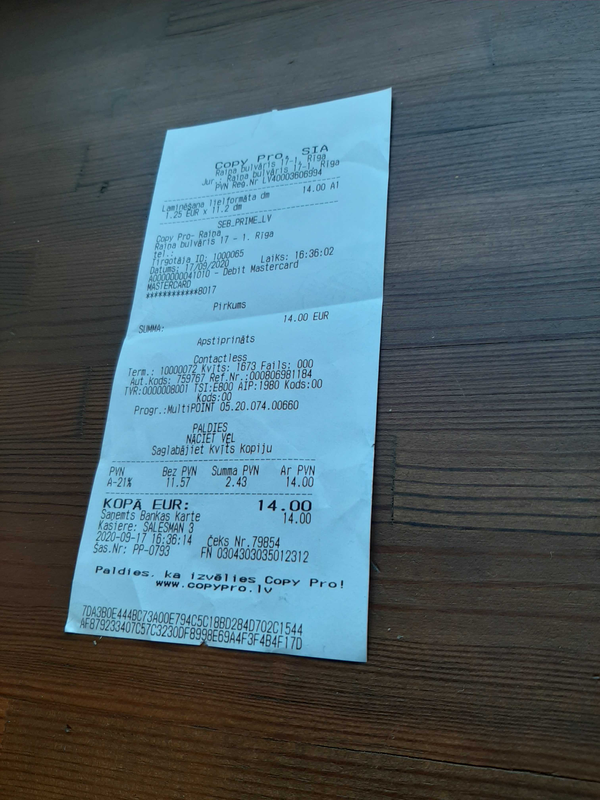

In [ ]:
import cv2

file_name = '/content/drive/MyDrive/cv_project_images/imgcv/5.jpg'

img = cv2.imread(file_name)


max_dimension = 800
height, width, _ = img.shape
if height > width:
    new_height = max_dimension
    new_width = int(width * (max_dimension / height))
else:
    new_width = max_dimension
    new_height = int(height * (max_dimension / width))
resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)


cv2.imshow('Resized Image', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Step 1: Receipt Contour Detection




In [ ]:
import cv2
import imutils

image = cv2.imread(file_name)

resize_ratio = 500 / image.shape[0]
original = image.copy()
image = imutils.resize(image, height=int(image.shape[0] * resize_ratio))


# 1.1. Convert image to grayscale

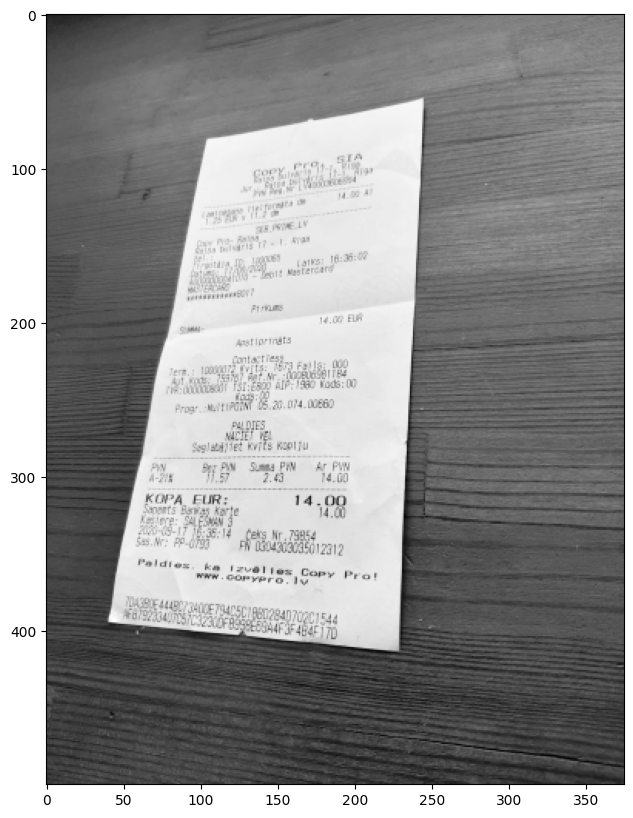

In [ ]:

image = cv2.imread('your_image.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


# 1.2. Get rid of noise with Gaussian Blur filter

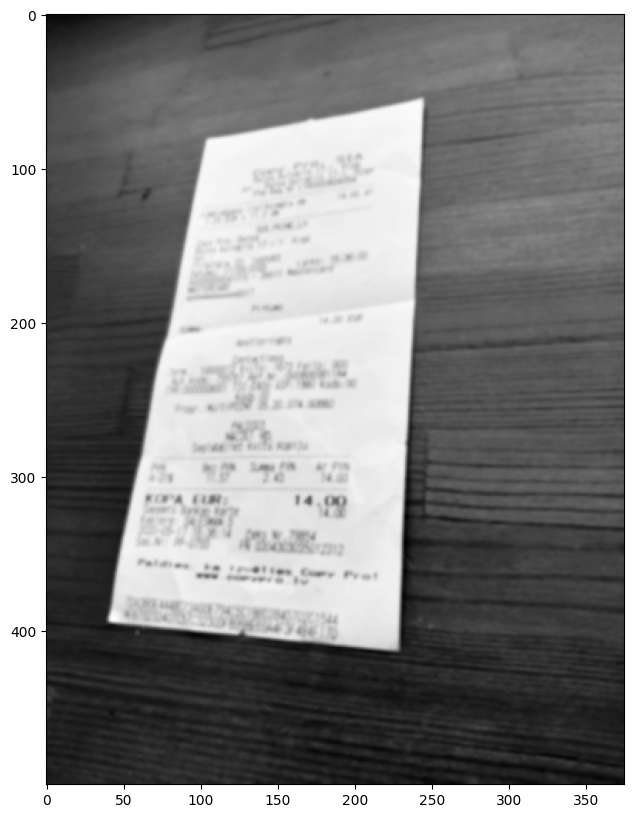

In [ ]:
import cv2
import matplotlib.pyplot as plt

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()


## Applying Median Blur on Original Image

In [ ]:


image = cv2.imread('image.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)


## Comparing Various Blur Results

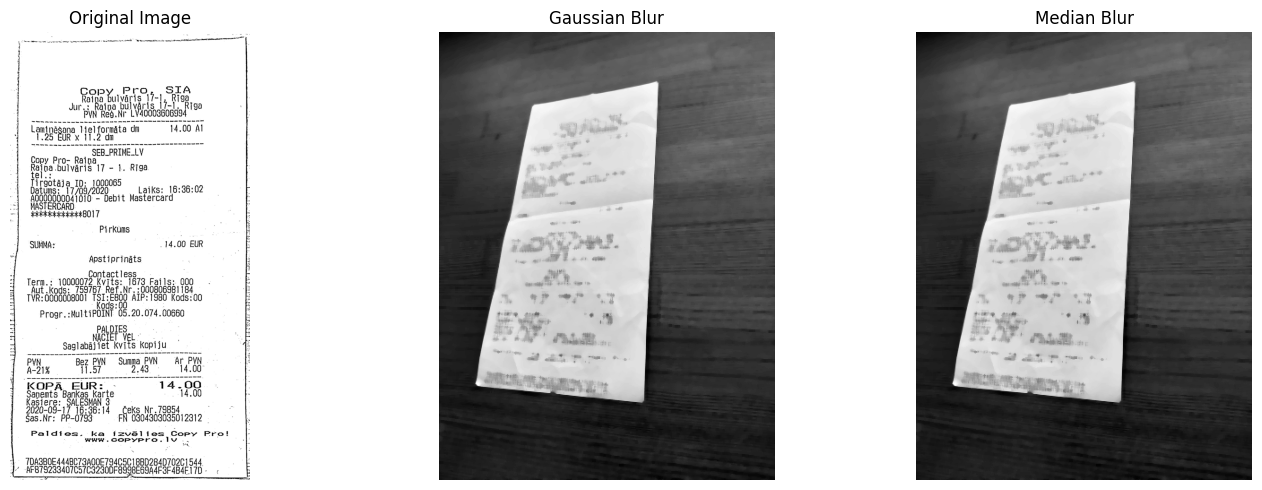

In [ ]:
import matplotlib.pyplot as plt
import cv2

class ImageVisualizer:
    @staticmethod
    def plot_images(image, blurred, median_blur):
        fig = plt.figure(figsize=(15, 5))

        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image')
        ax1.axis('off')

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.imshow(blurred, cmap='gray')
        ax2.set_title('Gaussian Blur')
        ax2.axis('off')

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.imshow(median_blur, cmap='gray')
        ax3.set_title('Median Blur')
        ax3.axis('off')

        plt.tight_layout()
        plt.show()

ImageVisualizer.plot_images(image, blurred, median_blur)


# Apply Dilation to Detect Regions

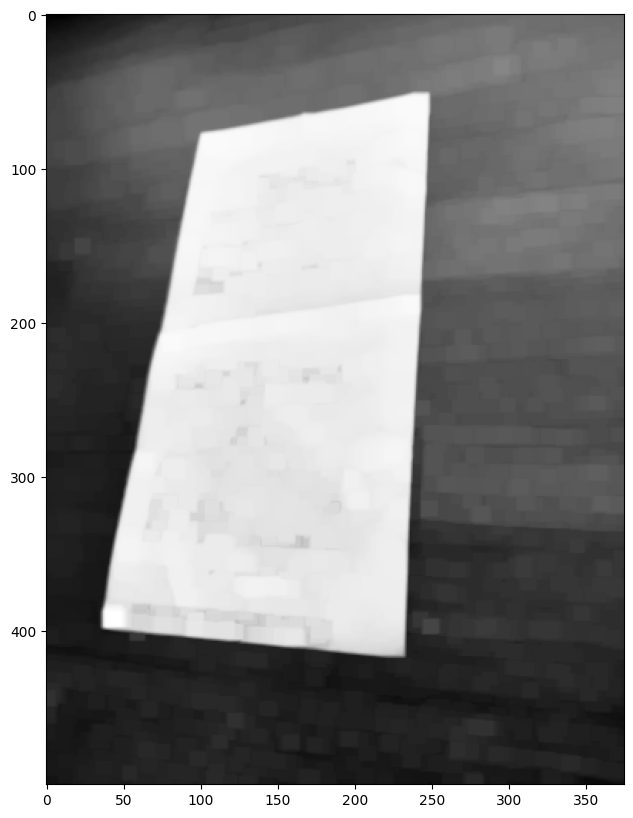

In [ ]:


kernel_size = 9
rect_kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)


dilated = cv2.morphologyEx(blurred, cv2.MORPH_DILATE, rect_kernel)


plot_gray(dilated)


# Apply Canny Edge Detection

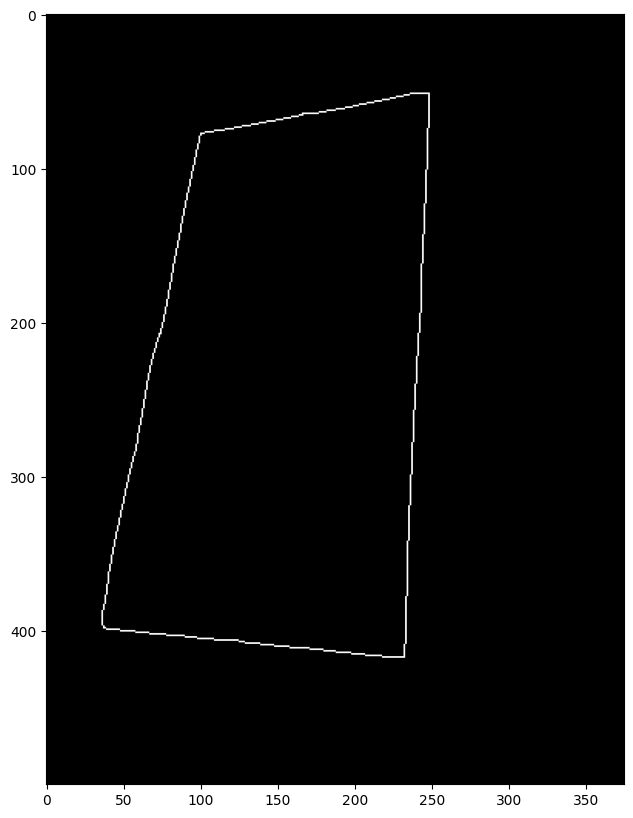

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

edged = feature.canny(dilated, sigma=3)


plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:



kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])


kernel_sobel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])


sobelx = cv2.filter2D(dilated, -1, kernel_sobel_x)
sobely = cv2.filter2D(dilated, -1, kernel_sobel_y)


sobel = cv2.magnitude(sobelx, sobely)


In [ ]:



kernel_scharr_x = np.array([[-3, 0, 3],
                           [-10, 0, 10],
                           [-3, 0, 3]])


kernel_scharr_y = np.array([[-3, -10, -3],
                           [0, 0, 0],
                           [3, 10, 3]])


scharrx = cv2.filter2D(dilated, -1, kernel_scharr_x)
scharry = cv2.filter2D(dilated, -1, kernel_scharr_y)


scharr = cv2.magnitude(scharrx, scharry)


## Comparision Of Various Edge Detector

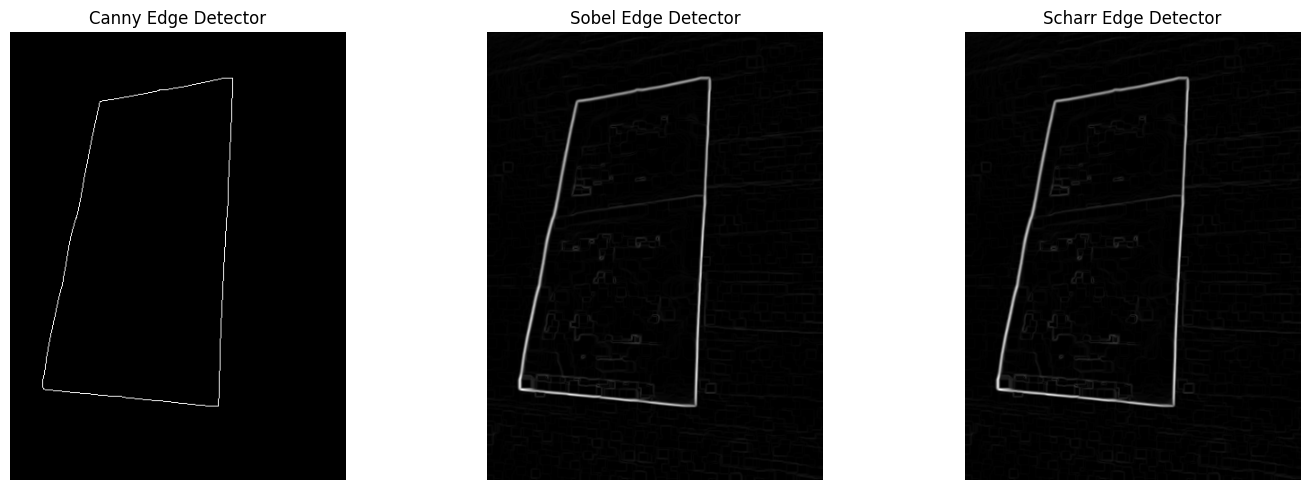

In [ ]:
import matplotlib.pyplot as plt

class EdgeVisualizer:
    @staticmethod
    def plot_edges(edged, sobel, scharr):
        fig = plt.figure(figsize=(15, 5))

        ax1 = fig.add_subplot(1, 3, 1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax3 = fig.add_subplot(1, 3, 3)

        ax1.imshow(edged, cmap='gray')
        ax1.set_title('Canny Edge Detector')
        ax1.axis('off')

        ax2.imshow(sobel, cmap='gray')
        ax2.set_title('Sobel Edge Detector')
        ax2.axis('off')

        ax3.imshow(scharr, cmap='gray')
        ax3.set_title('Scharr Edge Detector')
        ax3.axis('off')

        plt.tight_layout()
        plt.show()


EdgeVisualizer.plot_edges(edged, sobel, scharr)


# Detect all contours in Canny-edged image


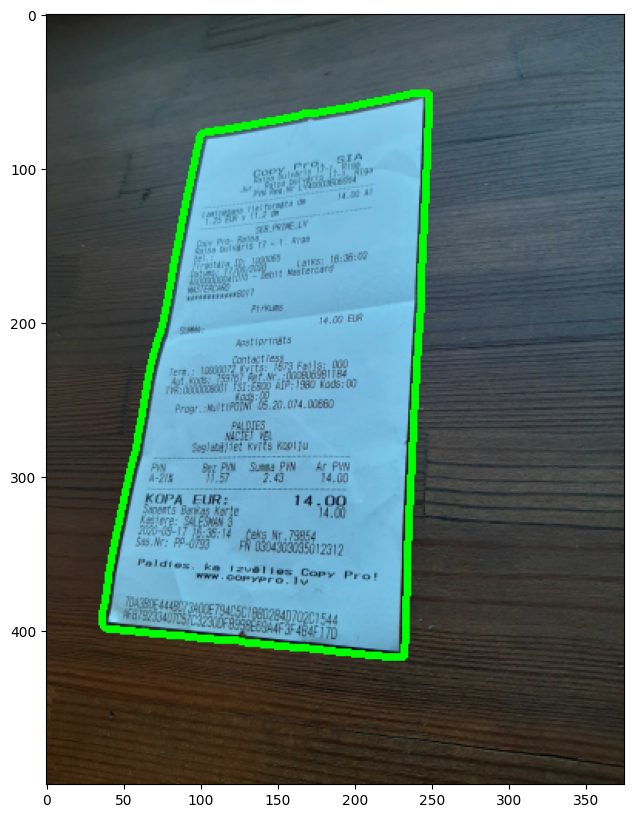

In [ ]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0,255,0), 3)


plot_rgb(image_with_contours)

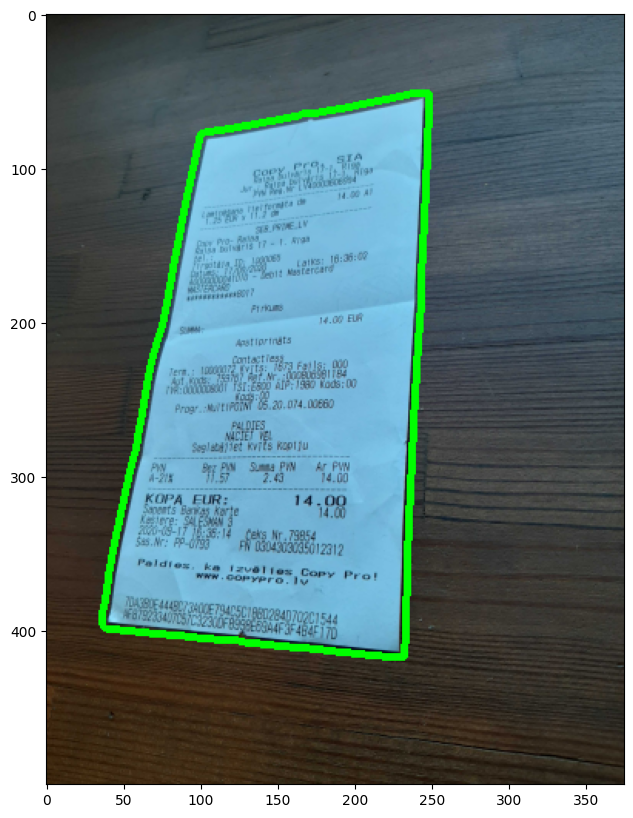

In [ ]:
contours, _ = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contours = sorted(contours, key=cv2.contourArea, reverse=True)


largest_contour = contours[0]


image_with_largest_contours = cv2.drawContours(image.copy(), [largest_contour], -1, (0, 255, 0), 3)


plot_rgb(image_with_largest_contours)

In [ ]:
receipt_contour = get_receipt_contour(largest_contours)

In [ ]:
print(receipt_contour)

[[[248  51]]

 [[100  77]]

 [[ 37 398]]

 [[232 417]]]


# Display the Image with Overlayed Contour

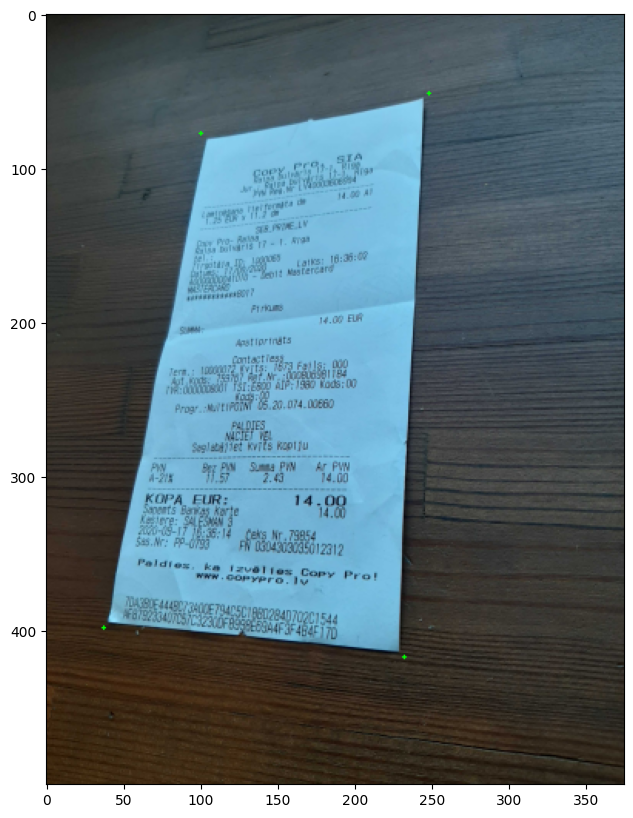

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image_rgb)


for contour in receipt_contour:
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], '-g', linewidth=2)


plt.show()

# Cropping and perspective restoration





# Display wrapped perspecive of receipt

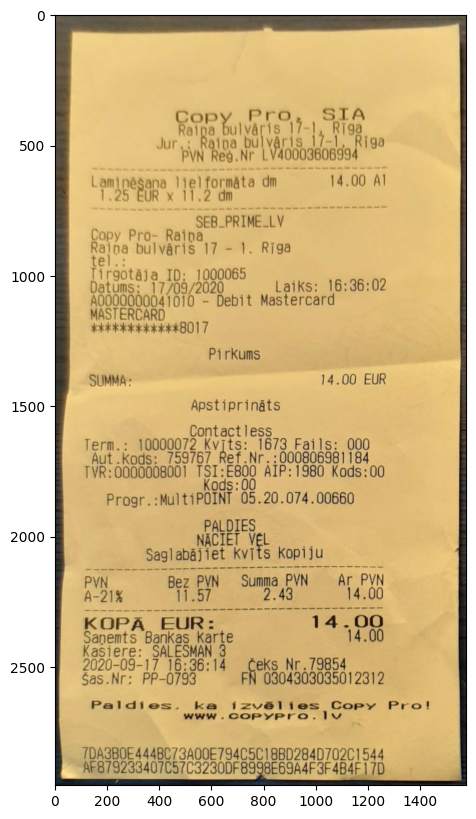

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageWarper:
    @staticmethod
    def warp_image(original, receipt_contour, width=600, height=800):
        rect = cv2.minAreaRect(receipt_contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        dst_pts = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype=np.float32)

        matrix = cv2.getPerspectiveTransform(box, dst_pts)

        warped = cv2.warpPerspective(original, matrix, (width, height))

        return warped

warped_image = ImageWarper.warp_image(original, receipt_contour)
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Threshold prepare image for OCR

# Computer Vision: Image Pre-Processing Model Output

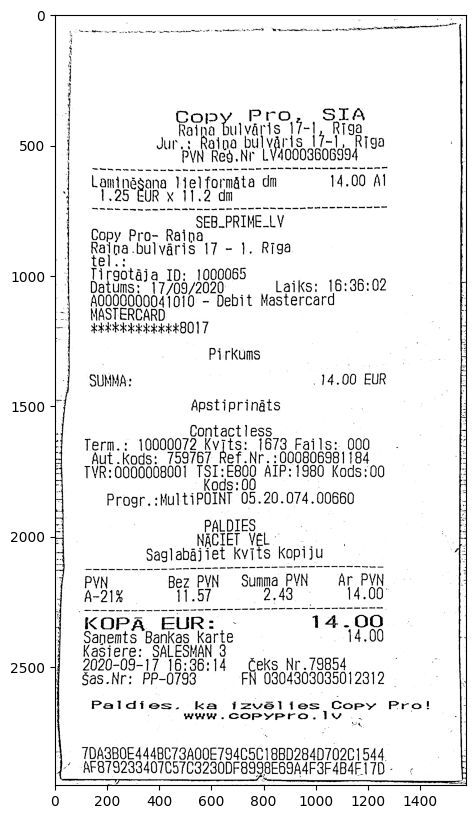

In [ ]:
result = bw_scanner(scanned)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

<ipython-input-38-2b1e61d658c0>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((800,800), Image.ANTIALIAS)


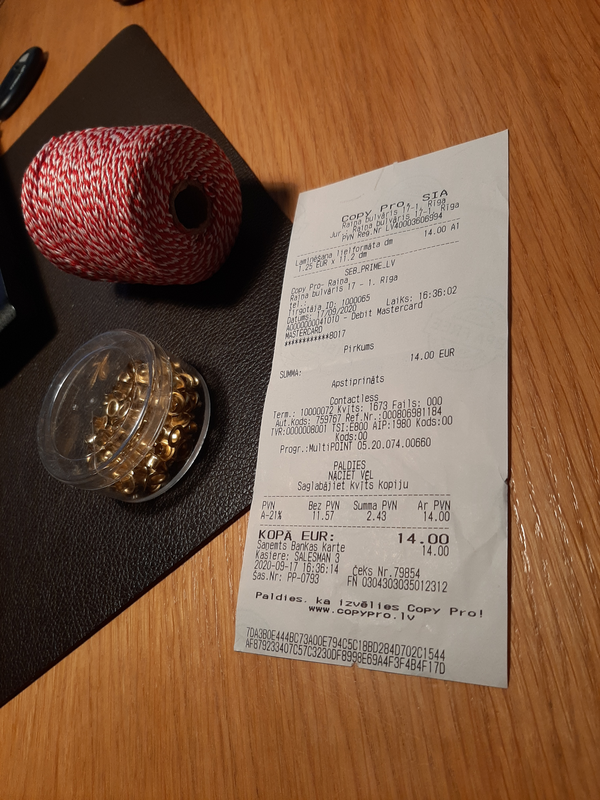

In [ ]:
import cv2


file_name = '/content/drive/MyDrive/cv_project_images/imgcv/4.jpg'

img = cv2.imread(file_name)
height, width = img.shape[:2]
max_dim = max(height, width)
if max_dim > 800:
    scale = 800 / max_dim
    new_width = int(width * scale)
    new_height = int(height * scale)
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

cv2.imshow('Resized Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
result_cv2 = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
cv2.imwrite('result.png', result_cv2)

## OCR MODEL

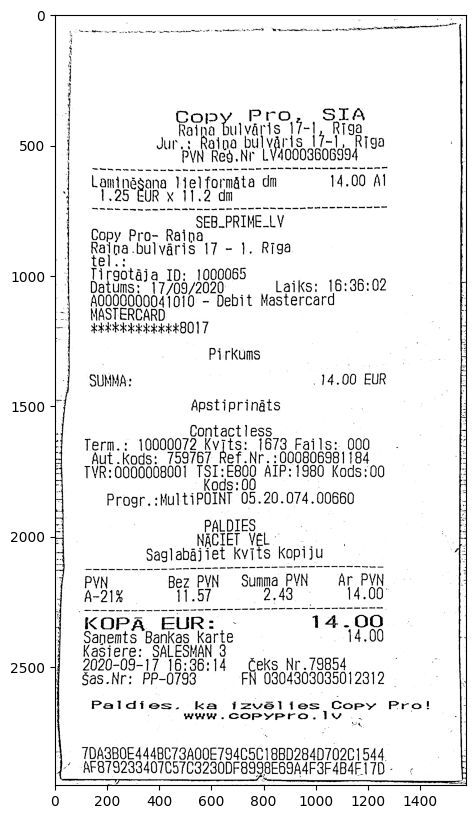

In [ ]:
file_name = "result.png"
image = mpimg.imread(file_name)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Text box detection

In [ ]:
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

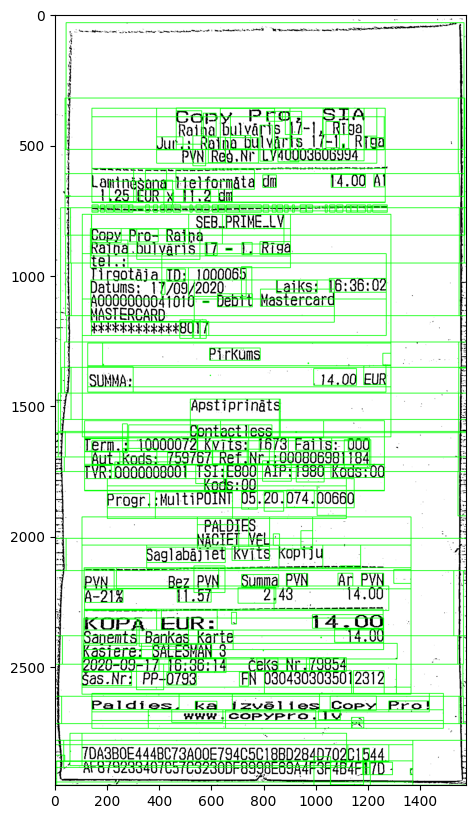

In [ ]:
image = cv2.imread('your_image_path.jpg')


boxes_data = pytesseract.image_to_boxes(image)


boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)


for box in boxes_data.splitlines():
    box = box.split()
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    boxes = cv2.rectangle(boxes, (x, y), (w, h), (0, 255, 0), 2)


plot_rgb(boxes)

# Text recognition

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (
    r'path_to_tesseract_executable' + ' --oem 3 --psm 6'
)


extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

4
| opy Pro, SIA
HME Ry |
| . rit Red. Nr [Wiedbgsoased .
| Lami negana Melformita dn 14.00 Al |
Y  LQSEURX 2m |
| copy oro Raine en RINE LY
7 Raina bulvaris 17-1. Riga :
| Tirgotaéja_ID: 1000065 ;
| pains’? $74B9/2020- Laiks: 16:36:02 =F
|  §0000000041010° - Debit Mastercard
=| MASTERCARD . £
| ebbbebbioeetB01 7 | —
; — Pirkums LE
+ SUNMA: | 14.00 EUR &f
| apstiprinats ee:
J 7 Contactless. is OF
“| Term.: 10000072 Kvjts: 1673 Fails: 000 = .- =
1 “Aut kods: 759767 Ret.Nr.:000806981184 =
4} TVR:0000008001 TS1,E800 AIP: 1980 Kods: 00 :
a ~AOdS: - =
5 Progr. :MultiPOINT 05.20.074.00660 ok
| : PALDIES -  ~ _&
| NACIET VEL: EF
~ Saglabajiet Kvits Kopiju “E
7 PVN. Bez PVN Summa PVN ArPYN.-  -—;
Aree NBT 2,48 14.00" .
| KOPA EUR:, - 14.00. |
: Sanents Bankas Karte - 14,00
} Kasiere: SALESMAN 3 : , . |
| 2020-09-17 16:36:14 Ceks Nr.79854 oy
Sas.Nr: PP-0793 FN 0304303035012312. si
Paldies. ka izuSlies Copy Pro! -
| mo wuw. coPYPra. |v ve of
| TDA3B0E444BC73A00E794C5C18B0284070201544. ok
{(_AFB7

# Applying Regular Expressions and String handling to clean up raw data

In [ ]:

exclusion_list = ["bank", "total", "promo", "vat", "change", "recyclable"]


remove_list = ["vit", "etc"]

In [ ]:
import re

class TextExtractor:
    @staticmethod
    def find_decimal_lines(extracted_text):
        regex_line = [line for line in extracted_text.splitlines() if re.search(r"[0-9]*\.[0-9]|[0-9]*\,[0-9]", line)]
        return regex_line

decimal_lines = TextExtractor.find_decimal_lines(extracted_text)
print(decimal_lines)


['| Lami negana Melformita dn 14.00 Al |', '+ SUNMA: | 14.00 EUR &f', '5 Progr. :MultiPOINT 05.20.074.00660 ok', 'Aree NBT 2,48 14.00" .', '| KOPA EUR:, - 14.00. |', ': Sanents Bankas Karte - 14,00', '| 2020-09-17 16:36:14 Ceks Nr.79854 oy']


In [ ]:
class TextProcessor:
    @staticmethod
    def filter_food_items(regex_lines, exclusion_list):
        food_items = [line for line in regex_lines if not any(exclude in line.lower() for exclude in exclusion_list)]
        return food_items


food_items = TextProcessor.filter_food_items(regex_line, exclusion_list)
print(food_items)


['| Lami negana Melformita dn 14.00 Al |', '+ SUNMA: | 14.00 EUR &f', '5 Progr. :MultiPOINT 05.20.074.00660 ok', 'Aree NBT 2,48 14.00" .', '| KOPA EUR:, - 14.00. |', '| 2020-09-17 16:36:14 Ceks Nr.79854 oy']


In [ ]:
class TextProcessor:
    @staticmethod
    def filter_food_items(regex_lines, exclusion_list):
        food_items = [line for line in regex_lines if not any(exclude in line.lower() for exclude in exclusion_list)]
        return food_items


food_items = TextProcessor.filter_food_items(regex_line, exclusion_list)
print(food_items)


['| Lami negana Melformita dn 14.00 Al |', '+ SUNMA: | 14.00 EUR &f', '5 Progr. :MultiPOINT 05.20.074.00660 ok', 'Aree NBT 2,48 14.00" .', '| KOPA EUR:, - 14.00. |', '| 2020-09-17 16:36:14 Ceks Nr.79854 oy']


In [ ]:
import re

class TextAnalyzer:
    @staticmethod
    def extract_item_costs(new_food_item_list):
        food_item_cost = [re.findall(r'\d*[.,]?\d+', line.replace(",", ".")) for line in new_food_item_list]
        food_item_cost = [cost for sublist in food_item_cost for cost in sublist if cost]
        return food_item_cost

food_item_cost = TextAnalyzer.extract_item_costs(new_food_item_list)
print(food_item_cost)


['| Lami negana Melformita dn 14.00 Al |', '+ SUNMA: | 14.00 EUR &f', '5 Progr. :MultiPOINT 05.20.074.00660 ok', 'Aree NBT 2,48 14.00" .', '| KOPA EUR:, - 14.00. |', '| 2020-09-17 16:36:14 Ceks Nr.79854 oy']


In [ ]:
import re

class TextProcessor:
    @staticmethod
    def remove_cost_price(food_items):
        only_food_items = [re.sub(r'(?:^| )\w(?:$| )', ' ', ''.join(char for char in item if char.isalpha() or char.isspace())).strip() for item in food_items]
        print(only_food_items)

TextProcessor.remove_cost_price(food_items)


['Lami negana Melformita dn  Al', 'SUNMA   EUR', 'Progr MultiPOINT  ok', 'Aree NBT', 'KOPA EUR', 'Ceks Nr oy']


In [ ]:
class TextProcessor:
    @staticmethod
    def clean_food_names(only_food_items):
        food = [' '.join([word for word in item.split() if len(word) != 2]) for item in only_food_items]
        return food


food = TextProcessor.clean_food_names(only_food_items)
print(food)


['Lami negana Melformita', 'SUNMA EUR', 'Progr MultiPOINT', 'Aree NBT', 'KOPA EUR', 'Ceks']


# Optical Character Recognition Model Output

In [ ]:
def create_food_table(food_items, costs):
    table = "Food Item    Cost\n"
    for food_item, cost in zip(food_items, costs):
        table += f"{food_item:<12}{cost}\n"
    return table

food_items = ['Pizza', 'Burger', 'Fries']
costs = [10, 5, 3]

print(create_food_table(food_items, costs))

+------------------------+--------+
|       Food Item        |  Cost  |
+------------------------+--------+
| Lami negana Melformita | 14.00  |
|       SUNMA EUR        | 14.00  |
|    Progr MultiPOINT    | 05.20  |
|        Aree NBT        |  .074  |
|        KOPA EUR        | .00660 |
|          Ceks          |  2.48  |
+------------------------+--------+
